# Birthrate Data

Load the birthrate data file, `./data/births.csv` and then create the following:

- pivot table with births by gender by decade
- plot the total births per year by gender (use Seaborn styles)
- use sigma clipping to remove outliers in the data (5 sigmas). Hint: use quartiles to estimate mean and sigma.
- convert the 'day' column to an int and then assign a datetime index
- add a dayofweek column and then plot average births by dayofweek and decade. Make sure to give the x axis meaningful labels
- create a pivot table of average births per day of year and then plot. Hint: create a dummy index for the pivot table using year 2012 (or any non-leap year) and month and day.

In [64]:
import pandas as pd
births = pd.read_csv('./data/births.csv')

In [65]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'Total births per year')

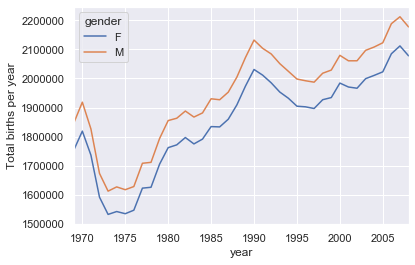

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # use Seaborn styles

births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('Total births per year')

In [67]:
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [68]:
mu = quartiles[1]
mu

4814.0

In [69]:
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

689.31

In [70]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [71]:
births['day'] = births['day'].astype(int)

In [72]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format="%Y%m%d")

In [74]:
births['dayofweek'] = births.index.dayofweek

Text(0, 0.5, 'Mean births by day')

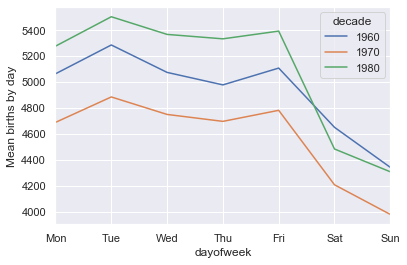

In [75]:
ax = births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()

ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.set_ylabel('Mean births by day')

In [51]:
births_by_date = births.pivot_table('births', index=[births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [52]:
# We can iterate the index because it is a MultiIndex - each index value is a tuple (month, day)
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


Text(0, 0.5, 'Avg daily births')

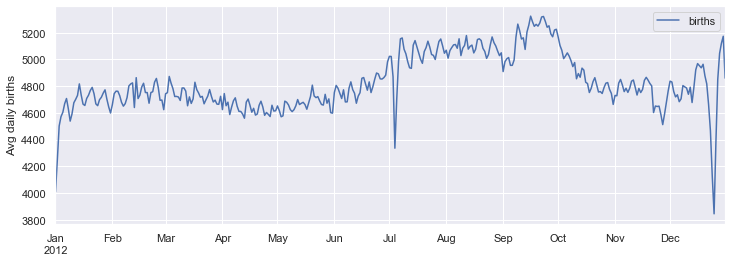

In [53]:
fix, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
ax.set_ylabel('Avg daily births')